In [6]:
# coding: utf-8
# Team : Quality Management Center
# Author：Guo Zikun
# Email: gzk798412226@gmail.com
# Date ：2021/5/7 16:46
# Tool ：PyCharm
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import xgboost
from sklearn.metrics import accuracy_score

def load_data():
    data = pd.read_csv('data/cancer/usingData/train/train.csv')
    #前4/5作为训练集，后1/5作为测试集
    data_training = data[0:int(len(data)*1/5)]
    print("lenge of train data : ", len(data))
    data_test = data[int(len(data)*1/5):len(data)]
    #分割
    train_x = np.array(data_training.iloc[:, [i for i in range(data_training.shape[1]-1)]])
    train_y = np.array(data_training['Recurrence'])
    test_x = np.array(data_test.iloc[:, [i for i in range(data_test.shape[1]-1)]])
    test_y = np.array(data_test['Recurrence'])

    return train_x, train_y, test_x, test_y

def XGBoost():
    train_x, train_y, test_x, test_y = load_data()
    #训练
    clf=XGBClassifier(base_score=0.5, booster='gbtree', learning_rate=0.05, max_depth=8, n_estimators=50)
    clf.fit(train_x, train_y)
    #测试
    result = clf.score(test_x, test_y)
    print("test :", len(test_x))
    print("accuracy :", result)
    
    return clf
    

if __name__ == '__main__':
    xgb_model = XGBoost()
    print(xgb_model)



lenge of train data :  5376
[15:57:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
test : 4301
accuracy : 0.7612183213206231
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


Explain

In [40]:
import shap

xgb_model = XGBoost()
train_x=pd.read_csv('data/cancer/usingData/train/train.csv')
train_x.head()

explainer = shap.explainers.Exact(xgb_model.predict_proba, train_x)
shap_values = explainer(train_x[:100])


lenge of train data :  5376
[16:38:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
test : 4301
accuracy : 0.7612183213206231


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


Exception: It takes 34359738368 masked evaluations to run the Exact explainer on this instance, but max_evals=100000!

Calculation paper===========================================================================================
===

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[16:04:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Exact explainer: 101it [00:16,  2.51it/s]                                                                                                                                                                                                   


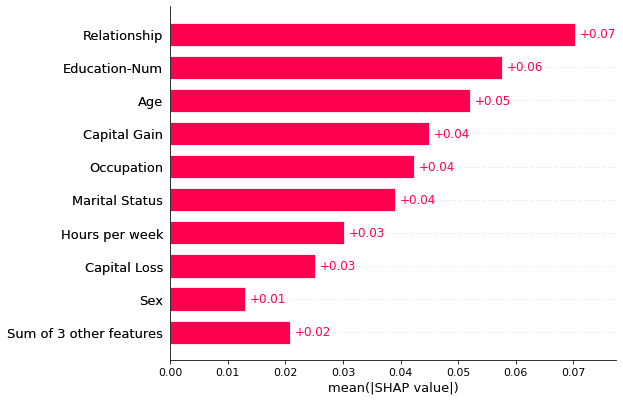

In [26]:

df = pd.DataFrame(test_x)
print(type(df))

<class 'pandas.core.frame.DataFrame'>
